In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
tel_df=pd.read_csv(r'c:\Datasets\churn_dataset.csv',na_values=' ')

In [3]:
tel_df.shape

(7043, 21)

In [4]:
tel_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
tel_df.duplicated().sum()

0

In [7]:
tel_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

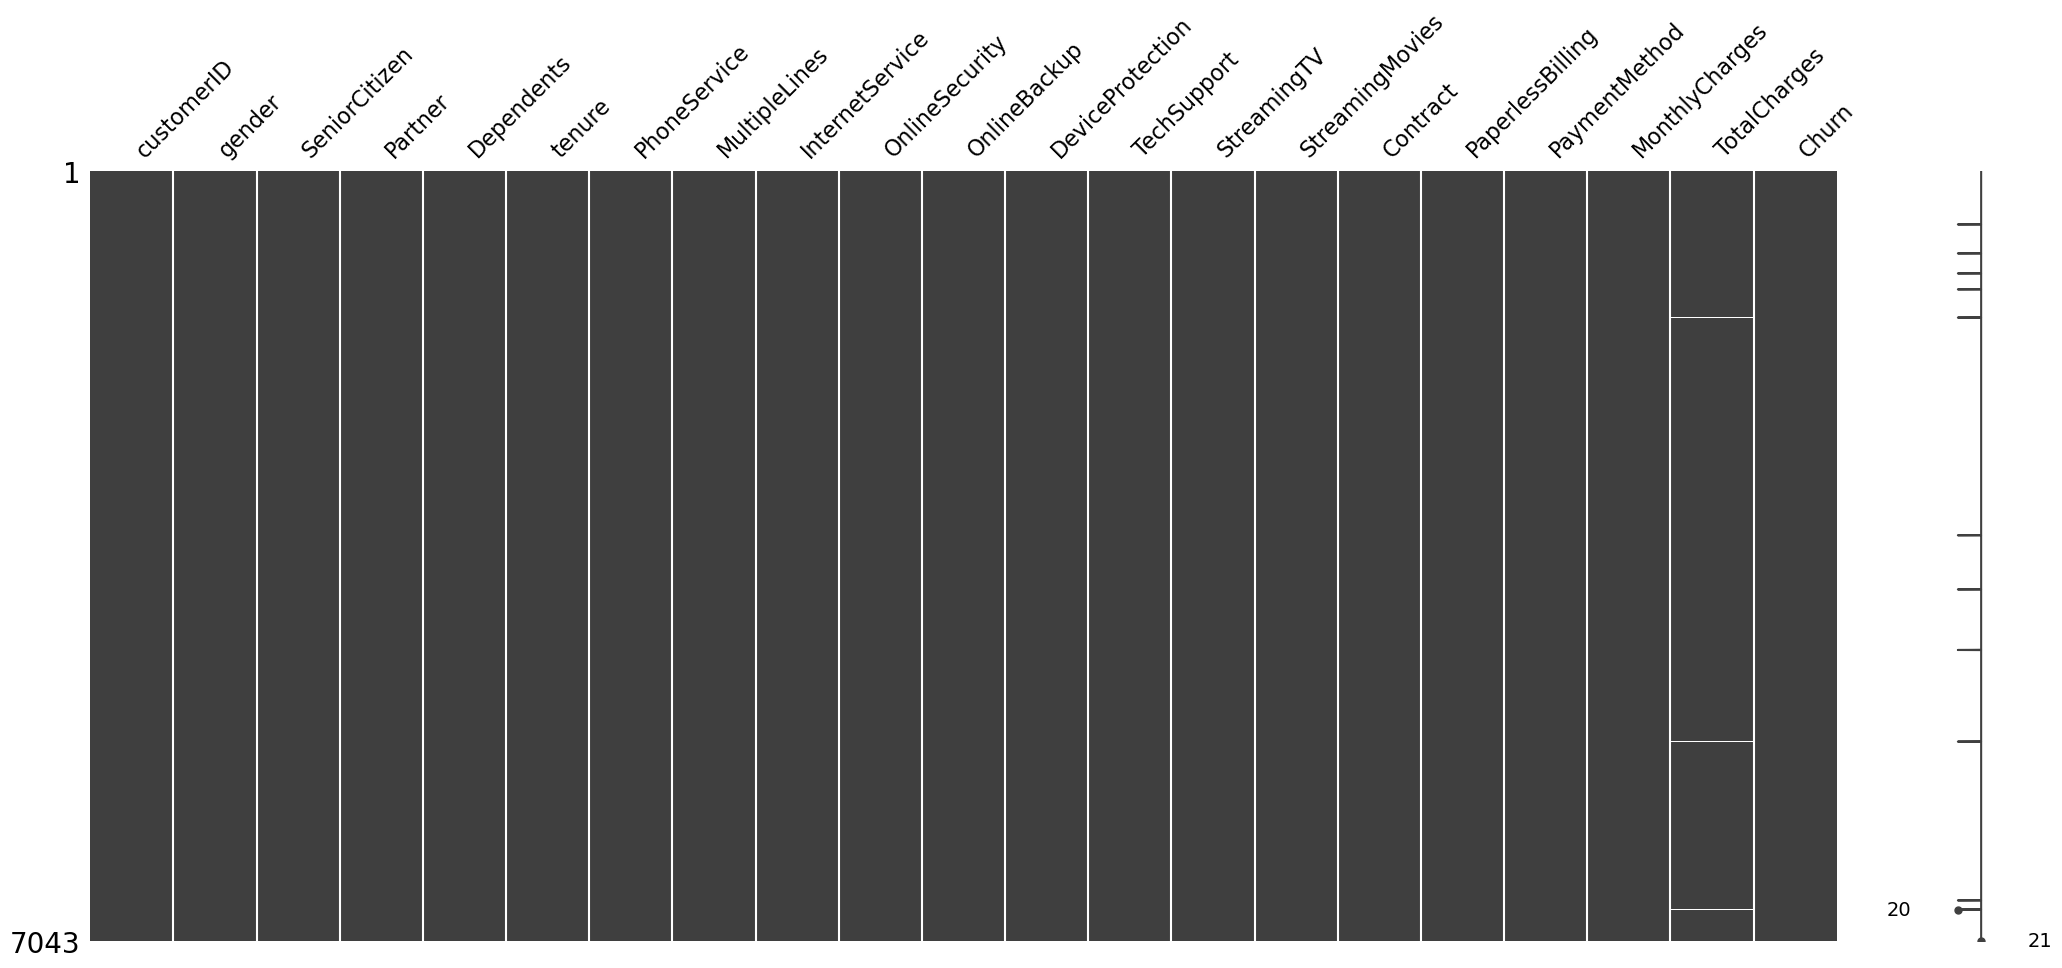

In [8]:
msno.matrix(tel_df);

In [9]:
tel_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
tel_df.drop('customerID',axis=1,inplace=True)

In [11]:
tel_df.dropna(inplace=True)

In [12]:
tel_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
tel_df.reset_index(inplace=True)

In [14]:
tel_df

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
tel_df.drop('index',axis=1,inplace=True)

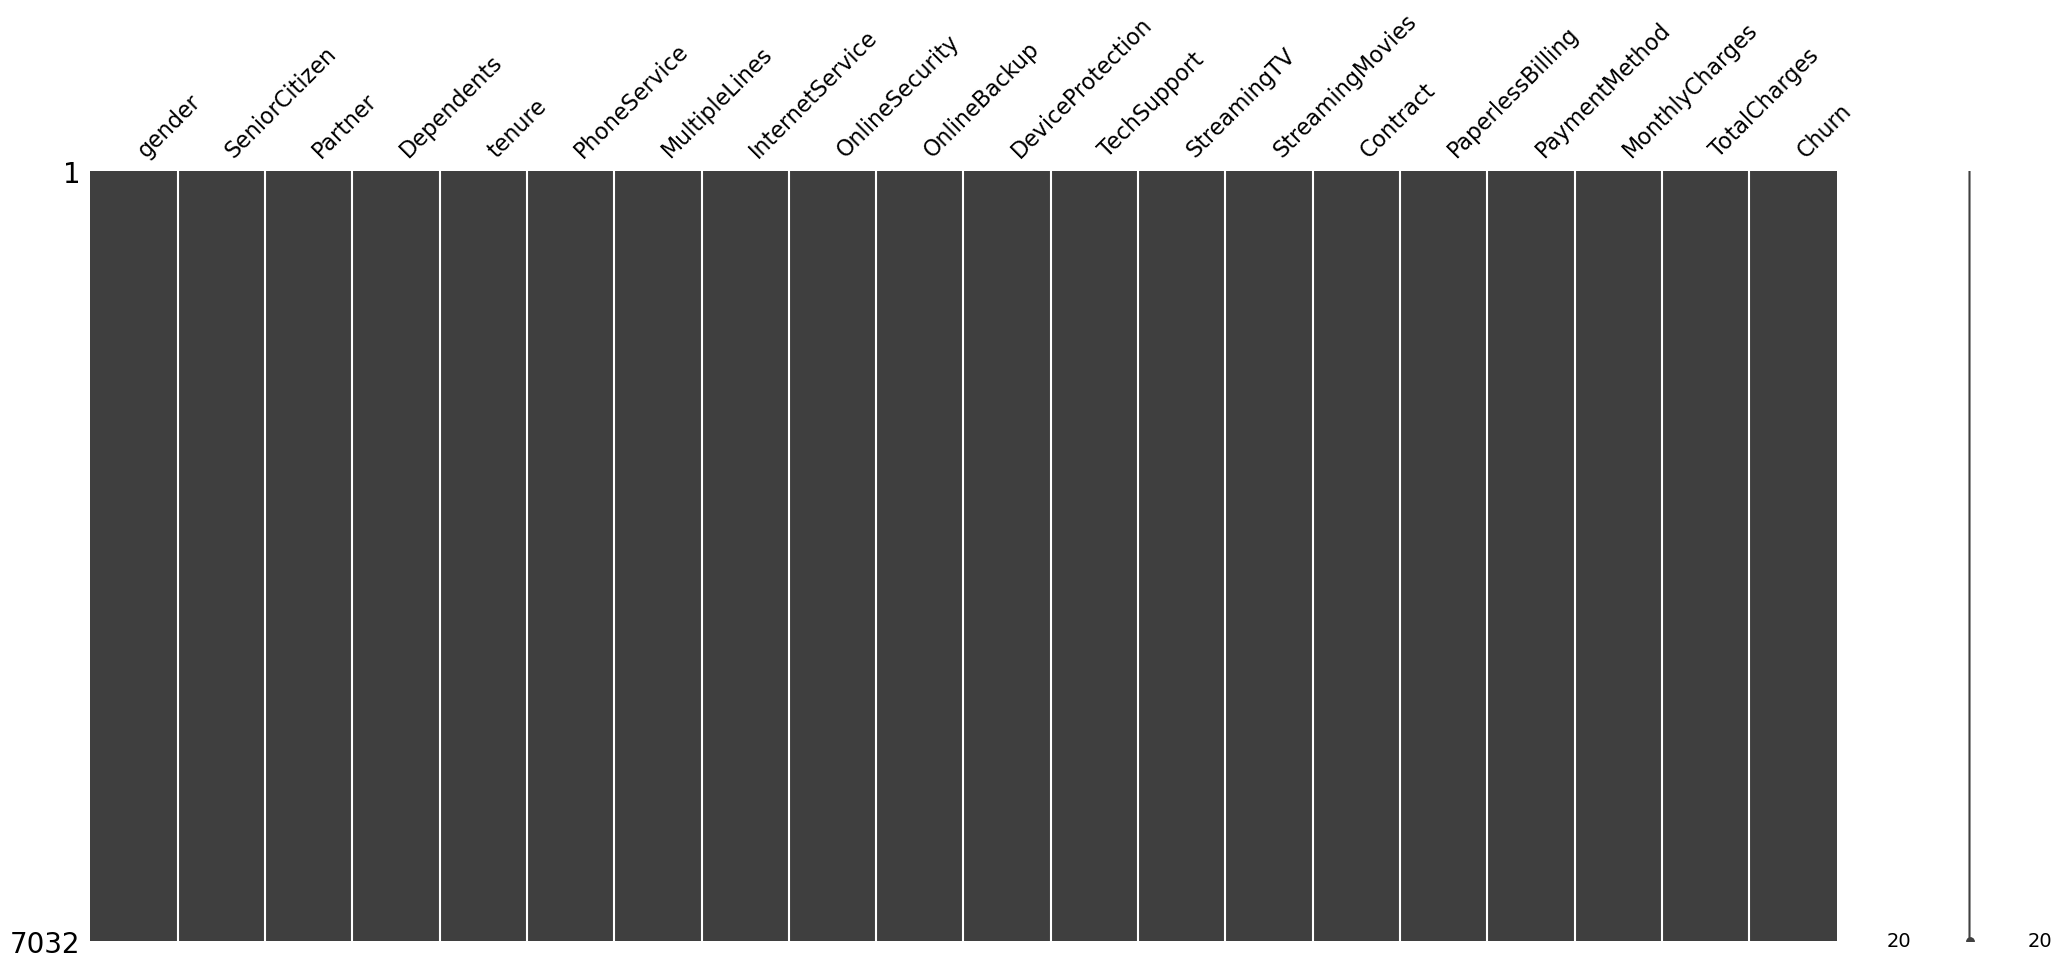

In [16]:
msno.matrix(tel_df);

In [17]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Explonatory Data Analysis 

In [18]:
tel_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Predict variable is churn:</h3>
       <div class="alert alert-block alert-info">
 <i> Customers who left within last month is a  <code>Churn</code></i>

In [19]:
# Looping through the columns to get unique values of each column.
for i in tel_df.columns:
    print(f"Unique {i}'s count: {tel_df[i].nunique()}")
    print(f"{tel_df[i].unique()}\n")

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingMovies's count: 3
['No' 'Yes' 'No internet service']

Unique

In [20]:
tel_df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

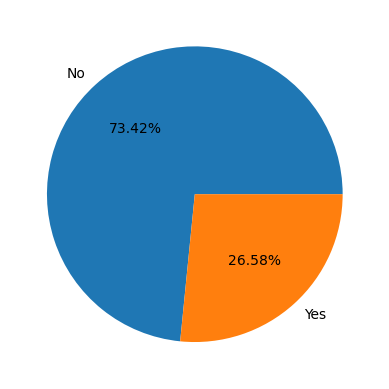

In [21]:
plt.pie(x=tel_df.Churn.value_counts().values,
       labels=tel_df.Churn.value_counts().index,autopct='%.2f%%');

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Insights :</h3>
    <div class="alert alert-block alert-info">
        
 <i> In our data 73.42% are do not churn and we can see that there are only 26.58% churners left.</i><br>

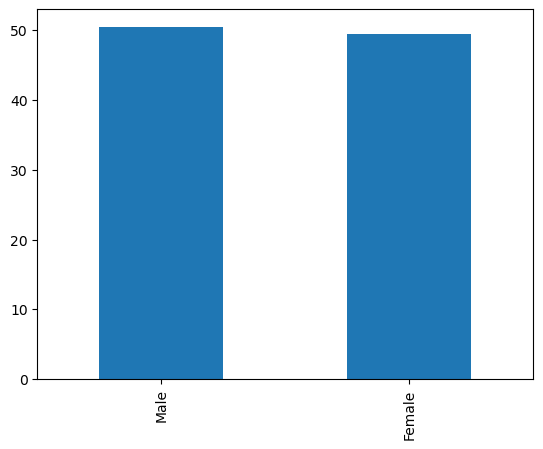

In [22]:
ax = (tel_df['gender'].value_counts()*100.0 /len(tel_df)).plot(kind='bar')

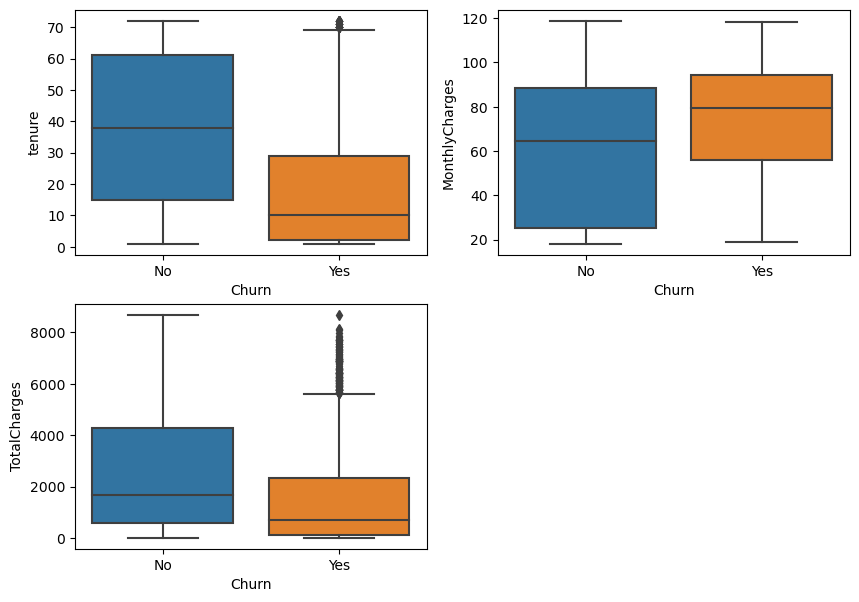

In [23]:
plt.figure(figsize=(10,7),dpi=100)

plt.subplot(221)
sns.boxplot(data=tel_df,x='Churn',y='tenure')

plt.subplot(222)
sns.boxplot(data=tel_df,x='Churn',y='MonthlyCharges')

plt.subplot(223)
sns.boxplot(data=tel_df,x='Churn',y='TotalCharges');

#plt.subplot(224)
#sns.boxplot(data=tel_df,x='OnlineSecurity',y='tenure',hue_order='Churn');

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Insights :</h3>
    <div class="alert alert-block alert-info">
        
* <i> Churning customers have much lower tenure with median of 10 months as compared to a median of non-churners of 38      months</i><br>
        
* <i> Churning customers have higher monthly charges with median of 80 as compared to non churners with median 65. </i><br>
        
* <i>TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.</i><br>
    </div>
    </div>

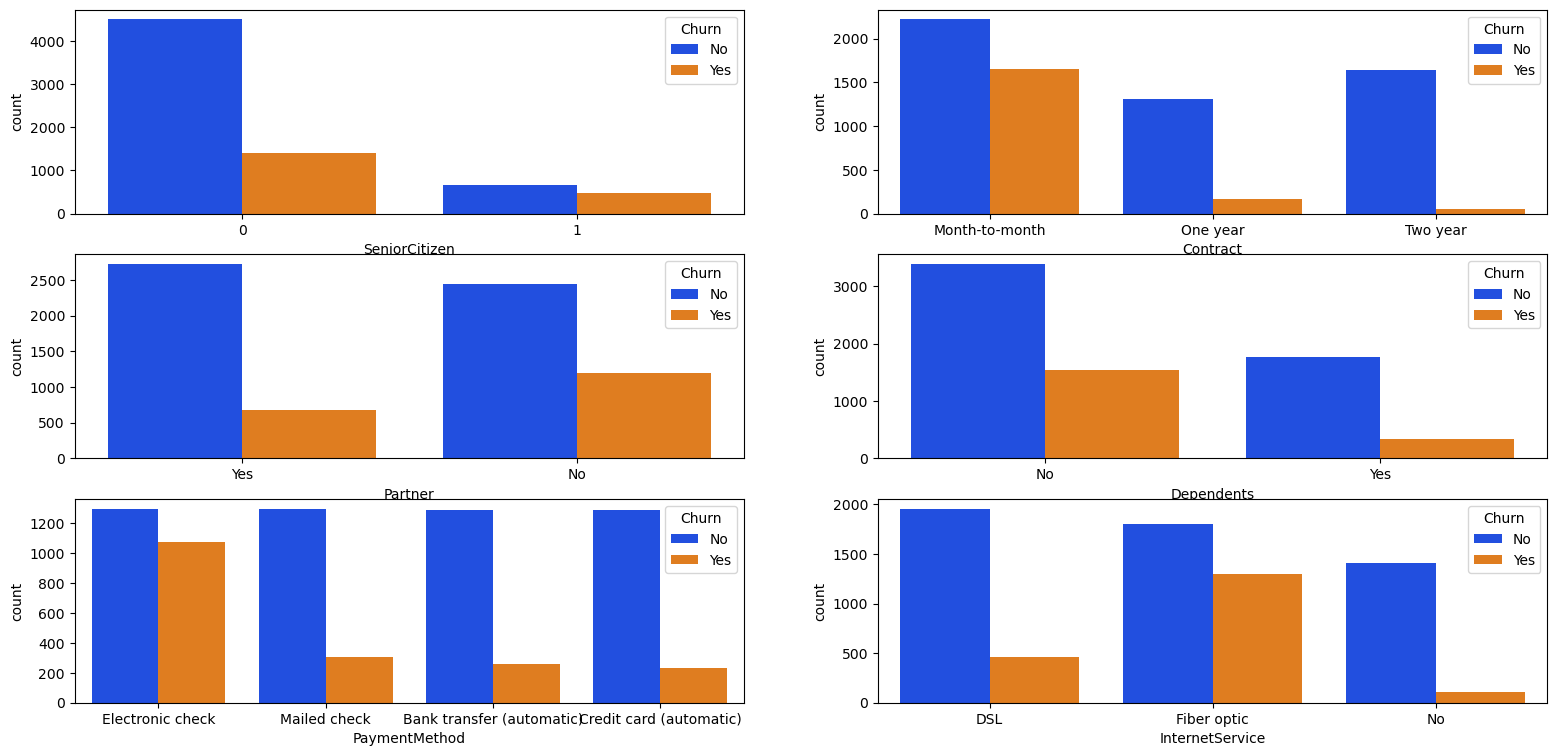

In [24]:
plt.figure(figsize=(19,9))

plt.subplot(321)
sns.countplot(x = 'SeniorCitizen',hue = 'Churn',data = tel_df,palette='bright')
#plt.title('SeniorCitizen')

plt.subplot(322)
sns.countplot(x = 'Contract',hue = 'Churn',data = tel_df,palette='bright')
#plt.title('Contract')

plt.subplot(323)
sns.countplot(x = 'Partner',hue = 'Churn',data = tel_df,palette='bright')
#plt.title('Partner')

plt.subplot(324)
sns.countplot(x = 'Dependents',hue = 'Churn',data = tel_df,palette='bright');
#plt.title('Dependents')

plt.subplot(325)
sns.countplot(x = 'PaymentMethod',hue = 'Churn',data = tel_df,palette='bright')
#plt.title('PaymentMethod')

plt.subplot(326)
sns.countplot(x = 'InternetService',hue = 'Churn',data = tel_df,palette='bright');
#plt.title('InternetService')

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Insights :</h3>
    <div class="alert alert-block alert-info">
        
* <i> Senior citizens churn rate is much higher than non-senior churn rate.</i><br>
        
* <i> Churn rate for month-to-month contracts much higher that for others contracts durations.</i><br>
                                                                                          
* <i> Higher churn rate for customers without partners.</i><br>
        
* <i> Much higher churn rate for customers who are non dependents.</i><br>
        
* <i>payment method for electonic check shows much higher churn rate than other payment methods.</i><br>
        
* <i> Customers with InternetService fiber optic as part of their contract have much higher churn rate.</i><br>
    </div>
    </div>

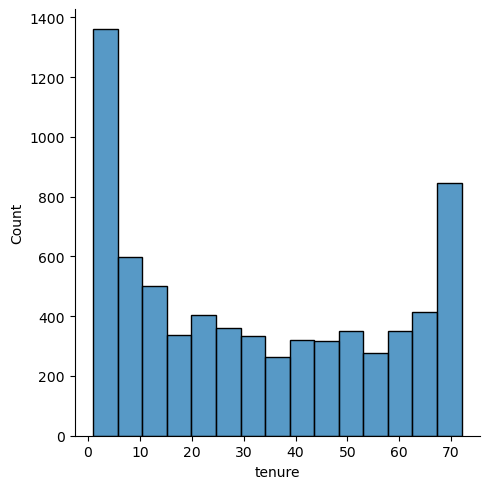

In [25]:
sns.displot(data=tel_df['tenure']);

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">Insights</h3>
    <div class="alert alert-block alert-info">
     <i>  As we can see that a lot of customers have been with the telecom company for just a month,while many are there for about 72 months. 

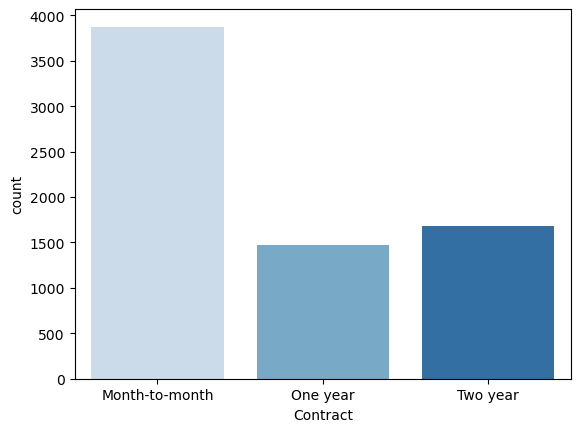

In [26]:
sns.countplot(x = 'Contract',data = tel_df,palette='Blues');

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">Insights</h3>
    <div class="alert alert-block alert-info">
     <i> As we can see from this graph most of the customers are in the month to month contract.While there are equal number of customers in the 1 year and 2 year contracts.</i>

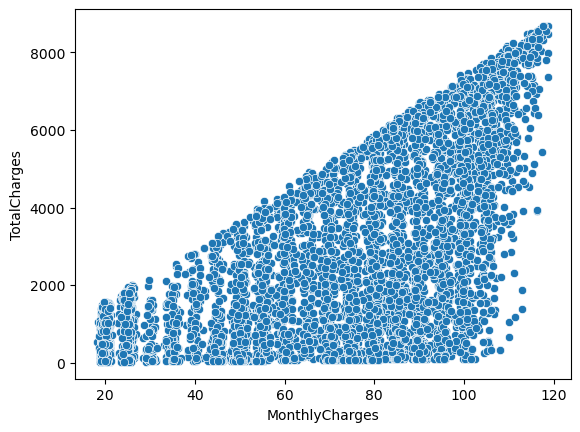

In [27]:
sns.scatterplot(data=tel_df[['MonthlyCharges','TotalCharges']],x='MonthlyCharges',y='TotalCharges');

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">Insights</h3>
    <div class="alert alert-block alert-info">
     <i> As we can see that monthlycharges increses as the totalcharges is also increasing.</i>

## Machine Learning 

## Data Preparation
* Train Test Split
* Encoding for Categorical Columns
    * Ordinal : LabelEncoding or OrdinalEncoding
    * Nominal : OneHotEncoding or get_dummies
* Encoding for Numerical Columns
* Standardization (z-transformation)


In [28]:
#!pip install -U scikit-learn

In [29]:
import sklearn
print(sklearn.__version__)

1.1.1


In [30]:
tel_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Identify the Target Variable and Splitting the Data into train and test

In [31]:
# Identifying the inputs (X) and output (y)

y=tel_df['Churn']
X=tel_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [32]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [33]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5514,Female,0,Yes,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.20,477.55
1671,Female,0,No,No,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,319.85
510,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15
1590,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40
3324,Female,0,Yes,No,18,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75


In [34]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


## Separating Categorical and Numerical Columns: 

In [35]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5514,Female,0,Yes,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.20,477.55
1671,Female,0,No,No,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,319.85
510,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.45,6300.15
1590,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.40
3324,Female,0,Yes,No,18,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 5514 to 5640
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5274 non-null   object 
 1   SeniorCitizen     5274 non-null   int64  
 2   Partner           5274 non-null   object 
 3   Dependents        5274 non-null   object 
 4   tenure            5274 non-null   int64  
 5   PhoneService      5274 non-null   object 
 6   MultipleLines     5274 non-null   object 
 7   InternetService   5274 non-null   object 
 8   OnlineSecurity    5274 non-null   object 
 9   OnlineBackup      5274 non-null   object 
 10  DeviceProtection  5274 non-null   object 
 11  TechSupport       5274 non-null   object 
 12  StreamingTV       5274 non-null   object 
 13  StreamingMovies   5274 non-null   object 
 14  Contract          5274 non-null   object 
 15  PaperlessBilling  5274 non-null   object 
 16  PaymentMethod     5274 non-null   objec

In [37]:
X_train_cat=X_train.select_dtypes(include=['object'])

In [38]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5514,Female,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1671,Female,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
510,Male,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
1590,Male,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
3324,Female,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check


In [39]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])

In [40]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5514,0,7,69.20,477.55
1671,0,4,80.15,319.85
510,0,61,106.45,6300.15
1590,1,2,74.70,165.40
3324,0,18,50.30,908.75


## Scaling the Numerical Features(Standardization)

In [41]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5514,0,7,69.20,477.55
1671,0,4,80.15,319.85
510,0,61,106.45,6300.15
1590,1,2,74.70,165.40
3324,0,18,50.30,908.75


In [43]:
#scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) Last after scaling
#(i.e the dataframe is converted to a numpy ndarry)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5514,-0.438945,-1.035648,0.151080,-0.795902
1671,-0.438945,-1.157923,0.514997,-0.865409
510,-0.438945,1.165295,1.389062,1.770434
1590,2.278188,-1.239439,0.333869,-0.933484
3324,-0.438945,-0.587308,-0.477051,-0.605849


## Applying OneHotEncoding on Categorical Columns

In [41]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5514,Female,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
1671,Female,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
510,Male,No,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
1590,Male,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
3324,Female,Yes,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check


In [42]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder(drop='first',sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns=encoder.get_feature_names_out(X_train_cat.columns),
                              index=X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5514,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1671,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
510,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1590,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3324,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [43]:
X_train_transformed = pd.concat([X_train_cat_ohe,X_train_num_rescaled],axis=1)

X_train_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5514,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.438945,-1.035648,0.151080,-0.795902
1671,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.438945,-1.157923,0.514997,-0.865409
510,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.438945,1.165295,1.389062,1.770434
1590,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2.278188,-1.239439,0.333869,-0.933484
3324,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.438945,-0.587308,-0.477051,-0.605849


In [44]:
X_train_transformed.isna().sum()

gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

## Data Preparation on Test Data

## Separating Categorical and Numerical Columns

In [45]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
939,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.85,2001.00
3724,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),104.50,5921.35
1756,Male,0,No,No,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1513.60
2278,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.55,71.55
1867,Female,0,Yes,Yes,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25


In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 939 to 1501
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1758 non-null   object 
 1   SeniorCitizen     1758 non-null   int64  
 2   Partner           1758 non-null   object 
 3   Dependents        1758 non-null   object 
 4   tenure            1758 non-null   int64  
 5   PhoneService      1758 non-null   object 
 6   MultipleLines     1758 non-null   object 
 7   InternetService   1758 non-null   object 
 8   OnlineSecurity    1758 non-null   object 
 9   OnlineBackup      1758 non-null   object 
 10  DeviceProtection  1758 non-null   object 
 11  TechSupport       1758 non-null   object 
 12  StreamingTV       1758 non-null   object 
 13  StreamingMovies   1758 non-null   object 
 14  Contract          1758 non-null   object 
 15  PaperlessBilling  1758 non-null   object 
 16  PaymentMethod     1758 non-null   object

In [47]:
X_test_cat =X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
939,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3724,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1756,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2278,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1867,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [48]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
939,0,24,79.85,2001.00
3724,0,57,104.50,5921.35
1756,0,58,24.45,1513.60
2278,0,1,71.55,71.55
1867,0,41,19.70,804.25


##  Scaling the Numerical Features(Standardization)

In [49]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
939,-0.438945,-0.342758,0.505026,-0.124435
3724,-0.438945,1.002262,1.324255,1.603476
1756,-0.438945,1.043021,-1.336161,-0.339259
2278,-0.438945,-1.280197,0.229180,-0.974849
1867,-0.438945,0.350131,-1.494025,-0.651908


### Applying OneHotEncoding on Categorical Columns

In [50]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                              columns=encoder.get_feature_names_out(X_test_cat.columns),
                              index=X_test_cat.index)
X_test_cat_ohe.head()



,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
939,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3724,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2278,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1867,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Concatination

In [51]:
X_test_transformed = pd.concat([X_test_cat_ohe,X_test_num_rescaled],axis=1)
X_test_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
939,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.438945,-0.342758,0.505026,-0.124435
3724,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,-0.438945,1.002262,1.324255,1.603476
1756,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-0.438945,1.043021,-1.336161,-0.339259
2278,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.438945,-1.280197,0.229180,-0.974849
1867,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.438945,0.350131,-1.494025,-0.651908


# Model Training  Phase

## KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier =KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [53]:
y_test_pred= classifier.predict(X_test_transformed)

In [54]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
939,No,No
3724,Yes,No
1756,No,No
2278,Yes,No
1867,No,No


In [55]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.76

## Logistic Regression 

In [56]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_transformed,y_train)


LogisticRegression()

In [57]:
y_test_pred=classifier.predict(X_test_transformed)

In [58]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
939,No,No
3724,Yes,No
1756,No,No
2278,Yes,Yes
1867,No,No


In [59]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred).round(2)

0.8

## Support vector Machines 

In [60]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [61]:
y_test_pred = classifier.predict(X_test_transformed)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
939,No,No
3724,Yes,No
1756,No,No
2278,Yes,Yes
1867,No,No


In [63]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.79

##  Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [65]:
y_test_pred = classifier.predict(X_test_transformed)

In [66]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
939,No,Yes
3724,Yes,No
1756,No,No
2278,Yes,Yes
1867,No,No


In [67]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.72

## Random Forest  Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [69]:
y_test_pred = classifier.predict(X_test_transformed)

In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
939,No,No
3724,Yes,No
1756,No,No
2278,Yes,No
1867,No,No


In [71]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred).round(2)

0.78

## Display a plot which shows all the algorithms applied along with the accuracies achieved.

In [72]:
algorithms=['KNN','Logistic Regression','Support Vecto Machine','Decision Tree','Random Forest']
accuracy = [0.78,0.8,0.79,0.72,0.78]

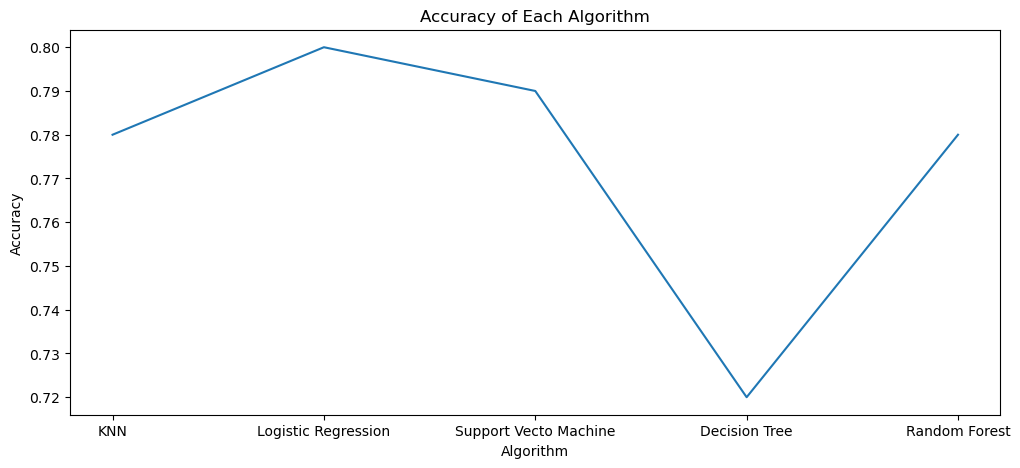

In [73]:
plt.figure(figsize=(12,5))
sns.lineplot(algorithms,accuracy)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Algorithm');

#### From the above plot we are able to understand that Logistic Regression having more accuracy while comparing other algorithms. 